# 简介

## 熵
表示随机变量的不确定性，定义如下：  

$$H(p)=-\sum_{i=1}^n p_ilogp_i$$

假设 $n=2$，则 $p_1+p_2=1$，$H(p)=-plogp-(1-p)log(1-p)$，可画图如下：

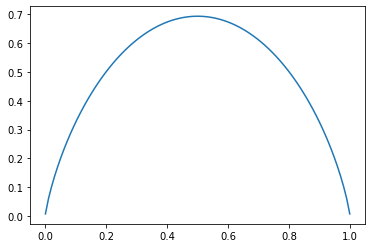

In [1]:
import matplotlib.pyplot as plt
import numpy as np

p = np.linspace(0.001,0.999,100)
plt.plot(p,-p*np.log(p)-(1-p)*np.log(1-p))
plt.show()

熵越大，随机变量的不确定性越大。  

下面是一个决策树问题的例子：

<img align="left" src="img/决策树举例.png" style="width:800px">  

计算这个数据集的熵：  

$$
\begin{align}
H(D)&=-\sum_{k=1}^k \frac{\left\vert C_k \right\vert}{\left\vert D \right\vert}log_2\frac{\left\vert C_k \right\vert}{\left\vert D \right\vert} \\\
&=-(\frac{6}{15}log_2\frac{6}{15}+\frac{9}{15}log_2\frac{9}{15}) \\\
&=0.971
\end{align}
$$

$D$ 表示数据条数，$k$ 表示数据类别，$C_k$ 表示第 $k$ 个类别的数据条数。

## 条件熵
定义如下：  

$$H(Y|X)=\sum_{i=1}^n p_iH(Y|X=x_i)$$

其中 $p_i=P(X=x_i)$

$$H(D|A)=\sum_{i=1}^n \frac{\left\vert D_i \right\vert}{\left\vert D \right\vert}H(D_i)=-\sum_{i=1}^n \frac{\left\vert D_i \right\vert}{\left\vert D \right\vert}\sum_{k=1}^K \frac{\left\vert D_{ik} \right\vert}{\left\vert D_i \right\vert}log_2\frac{\left\vert D_{ik} \right\vert}{\left\vert D_i \right\vert}$$

对于上面的数据集，若 $A$ 是年龄，$D_i$ 表示 $A$ 可能的取值，即青年、中年、老年：  

$$
\begin{align}
H(D|A)&=\frac{\left\vert D_1 \right\vert}{\left\vert D \right\vert}H(D_1)+\frac{\left\vert D_2 \right\vert}{\left\vert D \right\vert}H(D_2)+\frac{\left\vert D_3 \right\vert}{\left\vert D \right\vert}H(D_3) \\\
&=-\frac{5}{15}(\frac{3}{5}log_2\frac{3}{5}+\frac{2}{5}log_2\frac{2}{5})-\frac{5}{15}(\frac{2}{5}log_2\frac{2}{5}+\frac{3}{5}log_2\frac{3}{5})-\frac{5}{15}(\frac{1}{5}log_2\frac{1}{5}+\frac{4}{5}log_2\frac{4}{5}) \\\
&=0.888
\end{align}
$$

## 信息增益

信息增益（也叫互信息，mutual information），定义如下：  

$$g(D,A)=H(D)-H(D|A)$$

其中 $D$ 是训练数据集，$A$ 是某个特征。  

根据信息增益准则的特征选择方法是：  
1. 对训练数据集（或子集） $D$，计算其每个特征的信息增益
2. 比较它们的大小，选择信息增益最大的特征

**信息增益算法**  
1. 计算数据集 $D$ 的经验熵 $H(D)$   

$$H(D)=-\sum_{k=1}^k \frac{\left\vert C_k \right\vert}{\left\vert D \right\vert}log_2\frac{\left\vert C_k \right\vert}{\left\vert D \right\vert}$$

2. 计算特征 $A$ 对数据集 $D$ 的经验条件熵 $H(D|A)$  

$$H(D|A)=\sum_{i=1}^n \frac{\left\vert D_i \right\vert}{\left\vert D \right\vert}H(D_i)=-\sum_{i=1}^n \frac{\left\vert D_i \right\vert}{\left\vert D \right\vert}\sum_{k=1}^K \frac{\left\vert D_{ik} \right\vert}{\left\vert D_i \right\vert}log_2\frac{\left\vert D_{ik} \right\vert}{\left\vert D_i \right\vert}$$

3. 计算信息增益

$$g(D,A)=H(D)-H(D|A)$$

对于上面的数据集，令 $A_1,A_2,A_3,A_4$ 分别为年龄、有工作、有房子、信贷情况，计算得
$g(D,A_1)=0.083,g(D,A_2)=0.324,g(D,A_3)=0.420,g(D,A_4)=0.363$  
其中 $A_3$ 的信息增益最大，因此第一次按是否有房子来划分。

# ID3算法

ID3算法：在决策树递归构建过程中，使用信息增益的方法进行特征选择  

决策树生成过程：  
1. 从根节点开始计算所有特征的信息增益，选择信息增益最大的特征作为节点特征  
2. 再对子节点递归调用以上方法，构建决策树  
3. 所有特征信息增益很小或没有特征可以选择时递归结束，得到一颗决策树

## 决策树代码实现

In [2]:
import operator
from math import log

<img src="img/01.png" width="500" align="left"/>

In [3]:
def loaddata():
    # 此处省略编码过程，青年-0，中年-1，老年-2，有工作-1，无工作-0，有房子-1，无房子-0，一般-0，好-1，非常好-2
    dataSet = [[0, 0,0,0, 'no'],
               [0, 0,0,1,'no'],
               [0, 1,0,1, 'yes'],
               [0, 1,1,0, 'yes'],
               [0, 0,0,0, 'no'],
               [1, 0,0,0, 'no'],
               [1, 0,0,1, 'no'],
               [1, 1,1,1, 'yes'],
               [1, 0,1,2, 'yes'],
               [1, 0,1,2, 'yes'],
               [2, 0,1,2, 'yes'],
               [2, 0,1,1, 'yes'],
               [2, 1,0,1, 'yes'],
               [2, 1,0,2, 'yes'],
               [2, 0,0,0,'no']]
    feature_name = ['age','job','house','credit']
    return dataSet, feature_name

**1.计算数据集的熵**

$$H(D)=-\sum_{k=1}^k \frac{\left\vert C_k \right\vert}{\left\vert D \right\vert}log_2\frac{\left\vert C_k \right\vert}{\left\vert D \right\vert}$$

In [4]:
def entropy(dataSet):
    # 数据集条数
    m = len(dataSet)
    # 不同类别的计数
    labelCounts = {}
    # 循环数据集
    for featVec in dataSet:
        # 取标签
        currentLabel = featVec[-1]
        # 如果字典中不存在则为0，否则加1
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    # 保存最终的熵值
    e = 0.0
    # 根据公式计算熵
    for key in labelCounts:
        prob = float(labelCounts[key]/m)
        e -= prob*log(prob,2)
    return e

In [5]:
dataSet, feature_name = loaddata()
entropy(dataSet)

0.9709505944546686

In [6]:
dataSet

[[0, 0, 0, 0, 'no'],
 [0, 0, 0, 1, 'no'],
 [0, 1, 0, 1, 'yes'],
 [0, 1, 1, 0, 'yes'],
 [0, 0, 0, 0, 'no'],
 [1, 0, 0, 0, 'no'],
 [1, 0, 0, 1, 'no'],
 [1, 1, 1, 1, 'yes'],
 [1, 0, 1, 2, 'yes'],
 [1, 0, 1, 2, 'yes'],
 [2, 0, 1, 2, 'yes'],
 [2, 0, 1, 1, 'yes'],
 [2, 1, 0, 1, 'yes'],
 [2, 1, 0, 2, 'yes'],
 [2, 0, 0, 0, 'no']]

**2.划分数据集**

按照第axis个特征划分数据集，取出值为value的数据。

In [7]:
def splitDataSet(dataSet,axis,value):
    # 按轴和值划分好的数据集
    retDataSet = []
    # 循环数据集
    for featVec in dataSet:
        # 当前数据按轴取出的数据符合传入的value值
        if featVec[axis] == value:
            # 当前划分的这一列不要
            reducedFeatVec = featVec.remove
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
            
    return retDataSet

In [8]:
splitDataSet(dataSet,2,0)

[[0, 0, 0, 'no'],
 [0, 0, 1, 'no'],
 [0, 1, 1, 'yes'],
 [0, 0, 0, 'no'],
 [1, 0, 0, 'no'],
 [1, 0, 1, 'no'],
 [2, 1, 1, 'yes'],
 [2, 1, 2, 'yes'],
 [2, 0, 0, 'no']]

**3.选择最好的特征**

1. 计算数据集 $D$ 的经验熵 $H(D)$   
2. 计算特征 $A$ 对数据集 $D$ 的经验条件熵 $H(D|A)$  
3. 计算信息增益

In [9]:
def chooseBestFeature(dataSet):
    # 特征数
    n = len(dataSet[0]) - 1
    # 计算整个数据集的熵
    h_d = entropy(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1
    # 遍历每个特征
    for i in range(n):
        # 获取当前特征的所有值
        currentFeat = [example[i] for example in dataSet]
        # 当前特征的可能取值
        uniqueVals = set(currentFeat)
        # 定义一临时变量保存当前的条件熵
        h_da = 0.0
        # 循环每一个可能的取值
        for value in uniqueVals:
            # 按该值进行数据集划分
            subDataSet = splitDataSet(dataSet,i,value)
            # 计算条件熵
            prob = float(len(subDataSet)/len(dataSet))
            h_da += prob * entropy(subDataSet)
        # 计算信息增益
        g_da = h_d - h_da
        # 保存当前最大的信息增益及对应的特征
        if g_da > bestInfoGain:
            bestFeature = i
            bestInfoGain = g_da
    # 返回最优特征
    return bestFeature

In [10]:
chooseBestFeature(dataSet)

2

**4.类别投票表决**

当只剩下一个特征时，选择占比高的类别作为最终结果。

In [11]:
def classVote(classList):
    # 定义一字典，记录每个标签对应的个数
    labelCounts = {}
    # 循环计数
    for vote in classList:
        if vote not in labelCounts.keys():
            labelCounts[vote] = 0
        labelCounts[vote] += 1
    # 排序
    print("labelCounts.items()=",labelCounts.items())
    sortedClassCount = sorted(labelCounts.items(),key=operator.itemgetter(1),reverse=True)
    print("sortedClassCount:",sortedClassCount)
    return sortedClassCount[0][0]

In [12]:
classList = np.array(['yes','no','yes','no','yes'])
classVote(classList)

labelCounts.items()= dict_items([('yes', 3), ('no', 2)])
sortedClassCount: [('yes', 3), ('no', 2)]


'yes'

**5.递归训练一棵树**

In [13]:
def trainTree(dataSet,feature_name):
    # 取出最后一列
    classList = [example[-1] for example in dataSet]
    # 停止条件
    if classList.count(classList[0]) == len(classList):    # 所有类别都一致
        return classList[0]     
    if len(dataSet[0]) == 1:                               # 数据集中只剩下一个特征
        return classVote(classList)    
    
    bestFeature = chooseBestFeature(dataSet)
    bestFeatureName = feature_name[bestFeature]
    myTree = {bestFeatureName:{}}
    featVals = [example[bestFeature] for example in dataSet]
    uniqueVals = set(featVals)
    for value in uniqueVals:
        sub_feature_name = feature_name[:bestFeature]
        sub_feature_name.extend(feature_name[bestFeature+1:-1])
        # 递归调用函数，直到停止
        myTree[bestFeatureName][value] = trainTree(splitDataSet(dataSet,bestFeature,value),sub_feature_name)
        
    return myTree

In [14]:
myTree = trainTree(dataSet,feature_name)
print(myTree)

{'house': {0: {'job': {0: 'no', 1: 'yes'}}, 1: 'yes'}}


**6.预测**

In [15]:
def predict(inputTree,feature_name,testVec):
    print("inputTree.keys()=",inputTree.keys())    
    firstStr = list(inputTree.keys())[0]           # 取出顶点
    print("firstStr=",firstStr)
    secondDict = inputTree[firstStr]               # 取出顶点下面的树
    print("secondDict=",secondDict)
    featIndex = feature_name.index(firstStr)       # 取出顶点在特征中的索引值
    print("featIndex=",featIndex)
    key = testVec[featIndex]                       # 取出预测数据中顶点特征的值
    print("key=",key)
    # 
    valueOfFeat = secondDict[key]                  # 从顶点向下走一步
    print("---------------------------------")
    if isinstance(valueOfFeat, dict):              # 判断是字典还是字符串，如果是字典，递归调用predict，如果是字符串，则为最终结果
        classLabel = predict(valueOfFeat, feature_name, testVec)
    else: classLabel = valueOfFeat
    return classLabel

In [16]:
print(predict(myTree,feature_name,[1,1,0,1]))

inputTree.keys()= dict_keys(['house'])
firstStr= house
secondDict= {0: {'job': {0: 'no', 1: 'yes'}}, 1: 'yes'}
featIndex= 2
key= 0
---------------------------------
inputTree.keys()= dict_keys(['job'])
firstStr= job
secondDict= {0: 'no', 1: 'yes'}
featIndex= 1
key= 1
---------------------------------
yes


# C4.5算法

C4.5是对ID3的改进，在树生成过程中，使用信息增益比来选择特征。  

ID3计算信息增益公式：  

$$g(D,A)=H(D)-H(D|A)$$

C4.5计算信息增益公式：  

$$g_R(D,A)=\frac{g(D,A)}{H_A(D)}$$

其中，

$$H_A(D)=-\sum_{i=1}^n \frac{\left\vert D_i \right\vert}{\left\vert D \right\vert}log_2\frac{\left\vert D_i \right\vert}{\left\vert D \right\vert}$$

$n$ 是特征 $A$ 取值的个数  

对于上面的数据集，若 $A$ 是信贷情况，则  

$$H_A(D)=-(\frac{5}{15}log_2\frac{5}{15}+\frac{6}{15}log_2\frac{6}{15}+\frac{4}{15}log_2\frac{4}{15})$$

# 基尼指数生成决策树（CART算法）

CART算法：在树生成过程中，使用基尼指数选择最优特征。生成的是二叉树。  

1. 设样本点属于第 $k$ 类的概率为 $p_k$，则 $Gini(p)=\sum_{k=1}^K p_k(1-p_k)=1-\sum_{k=1}^K p_k^2$  
2. 给定样本集合 $D$，其基尼指数为：$Gini(D)=1-\sum_{k=1}^K (\frac{\left\vert C_k \right\vert}{\left\vert D \right\vert})^2$  
3. 在特征 $A$ 的条件下，集合 $D$ 的基尼指数为：  

$$Gini(D,A)=\frac{\left\vert D_1 \right\vert}{\left\vert D \right\vert}Gini(D1)+\frac{\left\vert D_2 \right\vert}{\left\vert D \right\vert}Gini(D2)$$

若有多个类别，每一次将一个类别划为正类，其余类别划为负类。  

基尼指数越大，样本的不确定性越大。选择**基尼指数最小**的特征为划分点。

用上面的数据集，根据基尼指数求最优特征：  
令 $A_1,A_2,A_3,A_4$ 分别为年龄、有工作、有房子、信贷情况，令 $D_1=\{A_1=青年\}$，则 $D_2=\{A_1=其他\}$：  

$Gini(D,A_1=1)=\frac{5}{15}Gini(D_1)+\frac{10}{15}Gini(D_2)=\frac{5}{15}[1-((\frac{2}{5})^2+(\frac{3}{5})^2)]+\frac{10}{15}[1-((\frac{3}{10})^+(\frac{7}{10})^2)]=0.44$  

令 $D_1=\{A_1=中年\}$，则 $D_2=\{A_1=其他\}$：  
$Gini(D,A_1=2)=0.48$  

令 $D_1=\{A_1=老年\}$，则 $D_2=\{A_1=其他\}$：  
$Gini(D,A_1=3)=0.44$  

$Gini(D,A_2=1)=0.32$  

$Gini(D,A_3=1)=0.27$  

$Gini(D,A_4=1)=0.36$  

$Gini(D,A_4=2)=0.47$  

$Gini(D,A_4=3)=0.32$  

因此选 $A_3$ 为最优特征，$A_3=1$ 为最优切分点。

# 决策树剪枝

决策树剪枝是为了避免树的深度过深，导致过拟合。

以上面的数据集为例，从原始数据集中抽出三条数据作为验证集：

<img align="left" src="img/预剪枝.png" width="450px">

* 预剪枝：每一次划分后，都用验证集代入，计算其精度，若精度提高了，则继续向下划分；若精度降低了，则退回上一层，从另一个节点开始划分。  
* 后剪枝：在模型训练完成后，代入验证集，计算整棵树的精度，然后把最深的一个节点剪掉，如果精度提高，则继续向上，如果精度降低，则保留该节点，继续下一个节点。

一般情况下，后剪枝的决策树欠拟合风险更小，泛化能力往往优于预剪枝的决策树，但是后剪枝是在生成整棵决策树后进行的，从下往上对非叶子节点进行考察，因此其训练开销比预剪枝的决策树更大。

# 决策树处理连续值与缺失值

## 处理连续值

下图中工资为连续值，我们无法对每个可能的取值计算信息增益，因此需要对其离散化处理。

<img align="left" src="img/决策树处理连续值.png" width="450px">

我们可以采用二分法。将工资从小到大排序 $x_1,x_2,...,x_15$，先将 $x_1$ 置为0，其他置为1，计算当前的信息增益 $g_1$；再将小于等于 $x_2$ 的值置为0，其他置为1，计算当前的信息增益 $g_2$；依此类推，最后一次将小于等于 $x_14$ 的值置为0，$x_15$ 置为1，得到$g_14$。将信息增益最大的作为划分准则。

## 处理缺失值

下图中标黄的为缺失值，最简单的办法是直接去掉有缺失值的数据，当数据量较大时，适合直接去掉，但是当数据量较小时，不适合采用此方案。

<img align="left" src="img/决策树处理缺失值.png" width="450px">

当数据量较小时，我们先计算不包含缺失数据的熵和条件熵，计算信息增益，然后将信息增益乘以该特征中不含缺失数据与全部数据的比例，得到最终的信息增益。选择信息增益最大的特征作为划分，该特征中的缺失数据会进入所有子节点，在每个节点中的权重为当前特征值不含缺失值的数据与全部数据的比例

# 多变量决策树

<img align="left" src="img/多变量决策树.png" width="650px">  

当决策边界过于复杂时，预测性能会比较低，我们可以将一些特征进行线性组合：  

<img align="left" src="img/多变量决策树2.png" width="350px">  

# sklearn实现决策树

In [17]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

Sklearn中实现的决策树都是二叉树

DecisionTreeClassifier的常用参数含义：
- criterion：‘gini’ or ‘entropy’ (default=”gini”)，前者是基尼系数，后者是信息熵。
- max_depth：决策树最大深度。常用来解决过拟合。
- min_impurity_decrease：这个值限制了决策树的增长，如果某节点的不纯度(基尼系数，信息增益)小于这个阈值，则该节点不再生成子节点。
- min_samples_split：如果是 int，则取传入值本身作为最小样本数； 如果是 float，则用 ceil(min_samples_split * 样本数量) 的值作为最小样本数，即向上取整。
- min_samples_leaf：如果是 int，则取传入值本身作为最小样本数； 如果是 float，则去 ceil(min_samples_leaf * 样本数量) 的值作为最小样本数，即向上取整。 这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。
- max_leaf_nodes：最大叶子节点数。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制，具体的值可以通过交叉验证得到。
- min_impurity_split：决策树在创建分支时，信息增益（基尼系数）必须大于这个阀值，否则不分裂

In [18]:
myData,feature_name = loaddata()
#取训练数据X
X = np.array(myData)[:,0:-1]
#取标签y
y = np.array(myData)[:,-1].reshape(-1,1)
#定义决策树
myTree = tree.DecisionTreeClassifier()
#fit数据
myTree.fit(X,y)
#预测[1,1,0,1]的分类
print(myTree.predict([[1,1,0,1]]))

['yes']


In [19]:
# 保存树结构
export_graphviz(
    myTree,
    out_file="data/tree.dot",
    feature_names=feature_name,
    class_names=['yes','no'],
    rounded=True,
    filled=True
)

In [20]:
# 打开树结构
with open("data/tree.dot") as f:
    dot_grapth = f.read()
dot = graphviz.Source(dot_grapth)
dot.view()

'Source.gv.pdf'

# 案例：使用决策树进行个人信用风险评估

## 数据源

使用UCI上的德国信用数据集。该数据集包含了1000个贷款信息，每一个贷款有20个自变量和一个类变量记录该笔贷款是否违约。
我们将使用该数据集构建模型来预测贷款是否违约。

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

credit = pd.read_csv("data/german_credit.csv")
credit.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


## 数据探索和预处理

该数据集包含1000个样本和21个变量。其中`default`表示信用好坏(0表示好，1表示坏)，其余为特征变量

使用`value_counts()`函数对支票余额变量`account_check_status`和储蓄账户余额变量`savings`进行查看。

In [22]:
credit.account_check_status.value_counts()

no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: account_check_status, dtype: int64

In [23]:
credit.savings.value_counts()

... < 100 DM                   603
unknown/ no savings account    183
100 <= ... < 500 DM            103
500 <= ... < 1000 DM            63
.. >= 1000 DM                   48
Name: savings, dtype: int64

上述两个变量的单位都是德国马克（Deutsche Mark, DM）。 直观来看，支票余额和储蓄账户余额越大，贷款违约的可能性越小。

该贷款数据集还有一些数值型变量，例如贷款期限（duration_in_month）和贷款申请额度（credit_amount）。  

我们需要把字符变量转换为数字。

In [24]:
# 查看哪些列是字符串类型
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [25]:
from sklearn.preprocessing import LabelEncoder

# 取所有字符串变量
cols = ['account_check_status','credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property',
        'other_installment_plans','housing','job','telephone','foreign_worker']

# 标签编码
for col in cols:
    scale = LabelEncoder()
    scale.fit(credit[col])
    credit[col] = scale.transform(credit[col])
    
credit.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,6,1,4,1169,4,0,4,3,2,4,2,67,1,1,2,1,1,1,1
1,1,0,48,3,4,5951,1,2,2,0,2,2,2,22,1,1,1,1,1,0,1
2,0,3,12,1,0,2096,1,3,2,3,2,3,2,49,1,1,1,3,2,0,1
3,0,1,42,3,7,7882,1,3,2,3,1,4,0,45,1,0,1,1,2,0,1
4,1,1,24,2,2,4870,1,2,3,3,2,4,3,53,1,0,2,1,2,0,1


In [26]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int32
 2   duration_in_month           1000 non-null   int64
 3   credit_history              1000 non-null   int32
 4   purpose                     1000 non-null   int32
 5   credit_amount               1000 non-null   int64
 6   savings                     1000 non-null   int32
 7   present_emp_since           1000 non-null   int32
 8   installment_as_income_perc  1000 non-null   int64
 9   personal_status_sex         1000 non-null   int32
 10  other_debtors               1000 non-null   int32
 11  present_res_since           1000 non-null   int64
 12  property                    1000 non-null   int32
 13  age                         1000 non-null   int64
 14  other_ins

## 划分训练集和测试集

在正式建模之前，我们需要将数据集分为训练集和测试集两部分。其中训练集用来构建决策树模型，测试集用来评估模型性能。  
我们将使用70%数据作为训练数据，30%作为测试数据。

In [31]:
from sklearn import model_selection

y = credit['default']
X = credit.loc[:,'account_check_status':'foreign_worker']
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.3,random_state=1)

In [35]:
# 训练集和测试集中，违约贷款的比例
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))

0    0.694286
1    0.305714
Name: default, dtype: float64
0    0.713333
1    0.286667
Name: default, dtype: float64


## 模型训练

我们将使用Scikit-learn中的DecisionTreeClassifier算法来训练决策树模型。  
DecisionTreeClassifier算法位于sklearn.tree包，首先将其导入，然后调用`fit()`方法进行模型训练。

In [36]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(min_samples_leaf= 6,random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=6, random_state=1)

## 模型性能评估

In [37]:
y_test_hat = model.predict(X_test)

In [38]:
from sklearn import metrics

print("混淆矩阵：")
print(metrics.confusion_matrix(y_test,y_test_hat))
print("评估指标：")
print(metrics.classification_report(y_test,y_test_hat))

混淆矩阵：
[[172  42]
 [ 47  39]]
评估指标：
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       214
           1       0.48      0.45      0.47        86

    accuracy                           0.70       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.70      0.70      0.70       300



在300个贷款申请测试数据中，模型的预测正确率（Accuracy）为70%。 214个未违约贷款中，模型正确预测了83%(recall值)。 86个违约贷款中，模型正确预测出了40%(recall)。 下面，我们看看是否能够进一步改善模型的性能。

## 模型性能提升

在实际应用中，模型的预测正确率不高，很难将其应用到实时的信贷评审过程。在本案例中，如果一个模型将所有的贷款都预测为“未违约”，此时模型的正确率将为72%，而该模型是一个完全无用的模型。  

上节中我们建立的模型，正确率为70%，但是对于违约贷款的识别性能很差。我们可以通过创建一个代价矩阵定义模型犯不同错误时的代价。  

假设我们认为一个贷款违约者给银行带来的损失是银行错过一个不违约的贷款带来损失的4倍，则未违约和违约的代价权重可以定义为：

In [41]:
weight = {0:1,1:4}     # 未违约-0，违约-1
model = DecisionTreeClassifier(max_depth=6,class_weight=weight)
model.fit(X_train,y_train)
y_hat = model.predict(X_test)

print("混淆矩阵：")
print(metrics.confusion_matrix(y_test,y_hat))
print("评估指标：")
print(metrics.classification_report(y_test,y_hat))

混淆矩阵：
[[114 100]
 [ 19  67]]
评估指标：
              precision    recall  f1-score   support

           0       0.86      0.53      0.66       214
           1       0.40      0.78      0.53        86

    accuracy                           0.60       300
   macro avg       0.63      0.66      0.59       300
weighted avg       0.73      0.60      0.62       300



可见，模型的整体正确率下降为60%，但是此时的模型能将86个违约贷款中的74个正确识别，识别率为78%(recall值)。